<a href="https://colab.research.google.com/github/supsi-dacd-isaac/TeachDecisionMakingUncertainty/blob/main/L04/CCP_feasibility_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Tutorial CCP - feasibility set
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm


# Chance-Constrained Optimization Problem

## Problem Description

We aim to solve the following **Chance-Constrained Program (CCP)**:

$$
\min_{a \in \mathcal{A}} \left\{ a_1 + 2a_2 : \mathbb{P}[g_1 \leq b_1 \text{ and } g_2 \leq b_2] \geq 1 - \alpha \right\}
$$

**Design Space**
$$
\mathcal{A} = \{a \in \mathbb{R}^2 : a_1 \in [-5, 5], a_2 \in [-5, 5]\}
$$

**Constraint functions**
- $ g_1(a, u) = (1-a_1)u_1 + a_2 u_2 \leq b_1$
- $ g_2(a, u) = a_1 u_1 + (1-a_2)u_2 \leq b_2$


Note that these constraints are linear constraints and we can therefore write the two inequality constraints $g_1\leq 0$ and $g_2 \leq 0$ as follows:


 $\begin{bmatrix} (1-a_1) & a_2 \\ a_1 &   (1-a_2) \end{bmatrix} \begin{bmatrix} u_1\\ u_2 \end{bmatrix} \leq  \begin{bmatrix} b_1\\ b_2 \end{bmatrix}  $


This is equivalent to the more compact linear inequality $ Au \leq b$, where


 $A = \begin{bmatrix} (1-a_1) & a_2 \\ a_1 &   (1-a_2)  \end{bmatrix}$

 and

 $u = \begin{bmatrix} u_1\\ u_2 \end{bmatrix} $



**Uncertainty**  

We known that our uncertain parameters $ (u_1, u_2) $ follow a **joint normal distribution**:

$$
(u_1, u_2) \sim \mathcal{N}(\mu, \Sigma)
$$

where:
- $\mu = [0, 1]$ and $ \Sigma = \begin{bmatrix} 1 & 0.5 \\ 0.5 & 4 \end{bmatrix} $


Based on this information

For vaious levels $\alpha$, visualize the feasibility set for the **individual** constraints:
  1. $\mathbb{P}[g_1 \leq b_1 ] \geq 1 - \alpha$,   
  2. $\mathbb{P}[ g_2 \leq b_2] \geq 1 - \alpha$.

For vaious levels $\alpha$, visualize the feasibility set for the **joint** constraint:  
  3. $\mathbb{P}[g_1 \leq b_1 \text{ and } g_2 \leq b_2] = \mathbb{P}[Au \leq b] \geq 1 - \alpha$

In [2]:
#@title First, let us define our problem parameters
a1_min, a1_max = -5, 5
a2_min, a2_max = -5, 5

mu = np.array([0, 1])  # Mean vector
Sigma = np.array([[1, 0.5], [0.5, 4]])  # Covariance matrix (variances on the diagonal and covariances on the off-diagonal)

In [3]:
#@title Define the objective functions (we will use this later)
def objective_function(a1,a2):
  return a1+2*a2

In [4]:
#@title We will have a better look at our uncertainty model now

# the function norm is used to define the marginal distributions of u1 and u2 as follows:
pdf_u1_marginal = norm(loc=0 ,scale=1)
pdf_u2_marginal = norm(loc=1 ,scale=2) # CODE IS MISSING HERE....

# multivariate_normal is used to define the joint distributions of u1 and u2 as follows:
pdf_u1u2_joint = multivariate_normal(mean=mu, cov=Sigma)

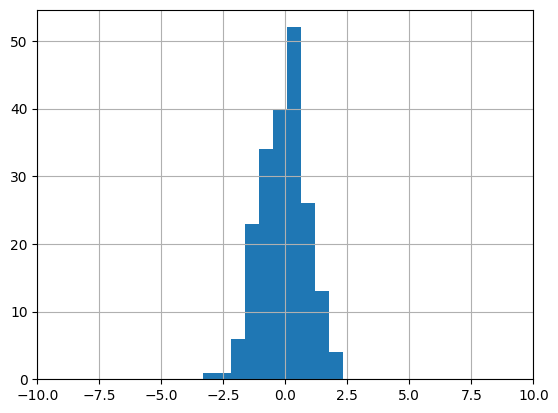

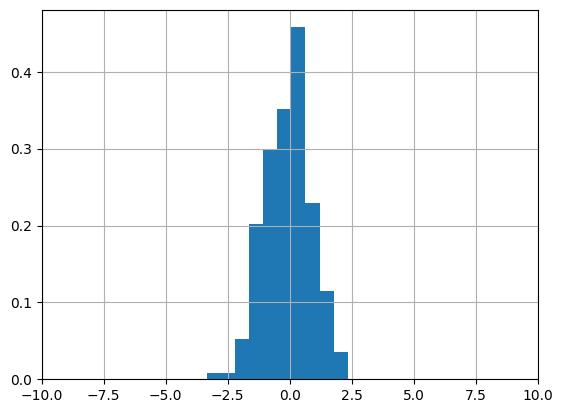

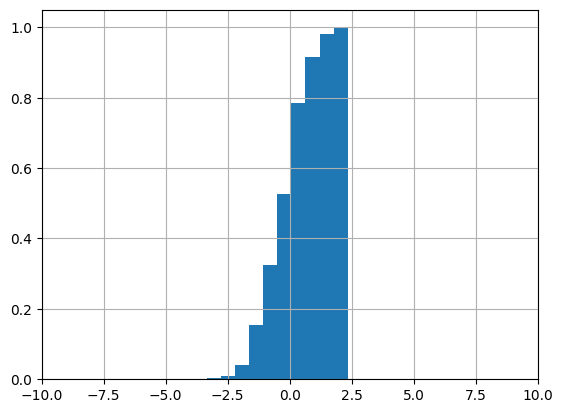

In [5]:
#@title explore uncertainty model (generate samples from the marginal of u1 and visualize pdf)
# generate some random samples  and see how the distributions look like
synthetic_samples_u1 = pdf_u1_marginal.rvs(size=200)   # generate some random samples for u1

plt.hist(synthetic_samples_u1)  # visualize histogram
plt.grid()
plt.xlim([-10,10]) # set the plot limits to [-10,+10]
plt.show()

plt.hist(synthetic_samples_u1, density=True) # visualize empirical PDF
plt.grid()
plt.xlim([-10,10]) # set the plot limits to [-10,+10]
plt.show()

plt.hist(synthetic_samples_u1, density=True, cumulative=True) # visualize empirical CDF
plt.grid()
plt.xlim([-10,10]) # set the plot limits to [-10,+10]
plt.show()




(-10.0, 10.0)

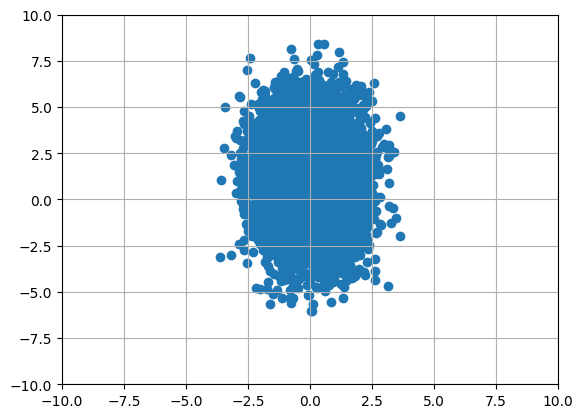

In [8]:
# ------ sample both u1 and u2 and how the scatter plot
samplesu1 = pdf_u1_marginal.rvs(10000) # CODE IS MISSING HERE-
samplesu2 = pdf_u2_marginal.rvs(10000) # CODE IS MISSING HERE-
plt.scatter(samplesu1, samplesu2) # visualize
plt.grid()
plt.xlim([-10,10]) # set the plot limits to [-10,+10]
plt.ylim([-10,10])

(-10.0, 10.0)

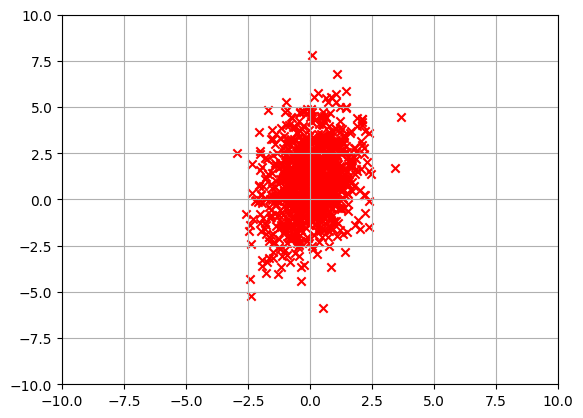

In [10]:
synthetic_samples = pdf_u1u2_joint.rvs(1000)  # CODE IS MISSING HERE-
plt.scatter(synthetic_samples[:,0], synthetic_samples[:,1],  marker='x', c='r')
plt.grid()
plt.xlim([-10,10]) # set the plot limits to [-10,+10]
plt.ylim([-10,10])

(-10.0, 10.0)

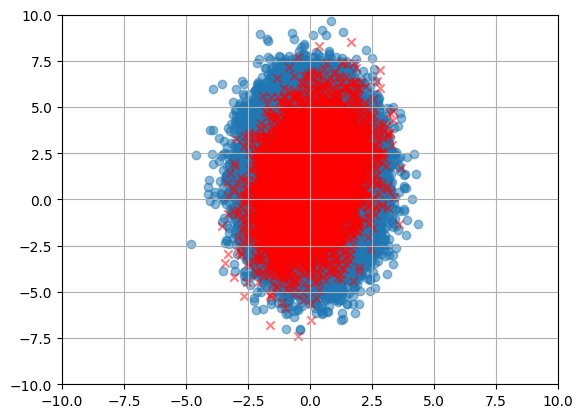

In [ ]:

plt.scatter(samplesu1, samplesu2, alpha=0.5) # visualize  the marginal samples
plt.scatter(synthetic_samples[:,0], synthetic_samples[:,1],  marker='x', c='r', alpha=0.5)  # visualize the samples from the joint distribution
plt.grid()
plt.xlim([-10,10]) # set the plot limits to [-10,+10]
plt.ylim([-10,10])

In [11]:
#@title les us start with an example of transformation

# assume we are trying to explre how good is the decision:
a1 = 2
a2 = 2

# the objective function result is

print('objective function=', objective_function(a1,a2), '....remember we need to find the minimum' )
print(      )
# we can then compute the matrix of coefficients
A = np.array([[1 - a1, a2], [a1, 1 - a2]])  # The matrix of coefficients is the one defining our inequalities g1<=0 and g2<=0
print('A = ')
print(A)
print( )
# A nice results from the theory is that if we have Au with u gaussian distributed then Ax is also gaussina
# Au is a multivariate gaussian with mean value (A*mu) and covariance (A*Sigma*A^T)

# let see how this look
mu_transformed = A @ mu  # Mean transformation ( this is the mean value of Ax, remember this A was defined by a1=2 and a2 =2)
print('mean vaector transformed = ', mu_transformed)
print( )


Sigma_transformed = A @ Sigma @ A.T  # Covariance transformation ( this is the covariance matrix for Ax)
print('Covariance transformed = ')
print(Sigma_transformed)
print( )

# we can also compute the standard deviations of the transformed Ax,
# remember the diagonal of the covariance are variances, so we can do take the diagonal and square root  variance = (standard deviation)**2

std_transformed =  np.sqrt(np.diag(Sigma_transformed)) # CODE IS MISSING HERE... square root of the diagonal transformed covariance matrix
print('standard deviation transformed =',std_transformed)


objective function= 6 ....remember we need to find the minimum

A = 
[[-1  2]
 [ 2 -1]]

mean vaector transformed =  [ 2 -1]

Covariance transformed = 
[[15.  -7.5]
 [-7.5  6. ]]

standard deviation transformed = [3.87298335 2.44948974]


In [15]:
# Let us say we are interested in achieving a constraint with a probability at least 1- alpha = 0.8
# Also, now we are looking at a tentative ecision (a1 = 1 and a2 = 4)
a1, a2 = 1, 4
alpha = 0.2

print('objective function=', objective_function(a1,a2), '....remember we need to find the minimum' )
print()

""" We know that Au is a joint gaussian because u is gaussian."""
""" the transofrmation shown before is used to define the paraemters (mean and covariance) of a bivariate Gaussian"""

A = np.array([[1 - a1, a2], [a1, 1 - a2]])
mu_transformed = A @ mu
Sigma_transformed = A @ Sigma @ A.T  # Covariance transformation ( this is the covariance matrix for Ax)
pdf_g1g2_joint = multivariate_normal(mean=mu_transformed, cov = Sigma_transformed) # CODE IS MISSING HERE...define the gaussian model for the constraints


# How can we solve Prob[Ax<=0] > 0.1? Ax is Gaussian....we know the CDF is by definition....

"""  Hence we know that Prob[Ax<=0] is the definition of CDF for F_{Ax}[0] """
b_selected = [3,3]
probability = pdf_g1g2_joint.cdf(b_selected) # CODE IS MISSING HERE...replace with appropriate probability...# use the bulit in function multivariate_normal.cdf([0,0])


# Verify weather Prob[Ax<=0] > 1-alpha
is_feasible = probability >= 1-alpha
print(probability)
print('is feasible?', is_feasible)

objective function= 9 ....remember we need to find the minimum

0.2985199434409721
is feasible? False


In [16]:
#@title We can now define a function to compute $\mathbb{P}[Au\leq b]$ and $\mathbb{P}[g_1\leq b_1]$ and $\mathbb{P}[g_2\leq b_2]$
# Function to compute probability P(g1 <= b1, g2 <= b2)

def compute_probability_magingal_and_jointly(a1, a2, b=[0,0]):
    A = np.array([[1 - a1, a2], [a1, 1 - a2]])  # Action-dependent matrix of coefficients

    # transformation:
    mu_transformed = A @ mu  # Mean of Au transformed
    Sigma_transformed = A @ Sigma @ A.T  # Covariance of Au transformed
    scale_vals = np.sqrt(np.diag(Sigma_transformed)) # Standard deviations transformed

    # Compute probability using marginal
    prob_g1 = norm.cdf(b[0], loc=mu_transformed[0], scale= scale_vals[0])
    prob_g2 = norm.cdf(b[1], loc=mu_transformed[1], scale= scale_vals[1])

    # Compute probability using bivariate normal CDF.... multivariate_normal.cdf
    prob_joint_g1_and_g2 = multivariate_normal(mean=mu_transformed, cov = scale_vals).cdf(b) # CODE IS MISSING HERE

    return prob_joint_g1_and_g2, prob_g1, prob_g2

In [17]:
alpha = 0.6
b_selected = [2,1]

# slect a 1st  candidate decision
a1=-2
a2=-2
print('FIRST CANDIDATE DECISION')
print('objective funtion = ', objective_function(a1,a2))

prob_jointly, prob_g1, prob_g2 = compute_probability_magingal_and_jointly(a1, a2, b=b_selected)

print('Let us have a look at the probabilities')
print('Prob[g1<=b1]=', prob_g1)
print('Prob[g2<=b2]=', prob_g2)
print('Prob[g1<=b1 and g2<=b2]=', prob_jointly)

print()
print(f'Let us have a look at the indicator functions for (a1,a2)={a1,a2}')
print(f'IS Prob[g2<=b1]>= 1- {alpha}?', prob_g1 >= 1- alpha)
print(f'IS Prob[g2<=b2]>= 1- {alpha}?', prob_g2 >= 1- alpha)
print(f'IS Prob[g1<=b1 and g2<=b2]>= 1- {alpha}?', prob_jointly >= 1- alpha)

# slect a 2nd candidate decision
a1=0.2
a2=0.3

print()
print('SECOND CANDIDATE DECISION')
print('objective funtion = ', objective_function(a1,a2))


prob_jointly, prob_g1, prob_g2 = compute_probability_magingal_and_jointly(a1, a2, b=b_selected)

print('Let us have a look at the probabilities')
print('Prob[g1<=b1]=', prob_g1)
print('Prob[g2<=b2]=', prob_g2)
print('Prob[g1<=b1 and g2<=b2]=', prob_jointly)

print()
print(f'Let us have a look at the indicator functions for (a1,a2)={a1,a2}')
print(f'IS Prob[g2<=b1]>= 1- {alpha}?', prob_g1 >= 1- alpha)
print(f'IS Prob[g2<=b2]>= 1- {alpha}?', prob_g2 >= 1- alpha)
print(f'IS Prob[g1<=b1 and g2<=b2]>= 1- {alpha}?', prob_jointly >= 1- alpha)



FIRST CANDIDATE DECISION
objective funtion =  -6
Let us have a look at the probabilities
Prob[g1<=b1]= 0.8206023210565292
Prob[g2<=b2]= 0.36580029447995066
Prob[g1<=b1 and g2<=b2]= 0.19812299701921832

Let us have a look at the indicator functions for (a1,a2)=(-2, -2)
IS Prob[g2<=b1]>= 1- 0.6? True
IS Prob[g2<=b2]>= 1- 0.6? False
IS Prob[g1<=b1 and g2<=b2]>= 1- 0.6? False

SECOND CANDIDATE DECISION
objective funtion =  0.8
Let us have a look at the probabilities
Prob[g1<=b1]= 0.9365753529924274
Prob[g2<=b2]= 0.5812435397450553
Prob[g1<=b1 and g2<=b2]= 0.5659029950235174

Let us have a look at the indicator functions for (a1,a2)=(0.2, 0.3)
IS Prob[g2<=b1]>= 1- 0.6? True
IS Prob[g2<=b2]>= 1- 0.6? True
IS Prob[g1<=b1 and g2<=b2]>= 1- 0.6? True


# Now we know how to check feasibility for one candidate a1 and a2....

lets try to repeat the analysis for many $(a1,a2)$ within the set
and for different levels $\alpha =[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]$

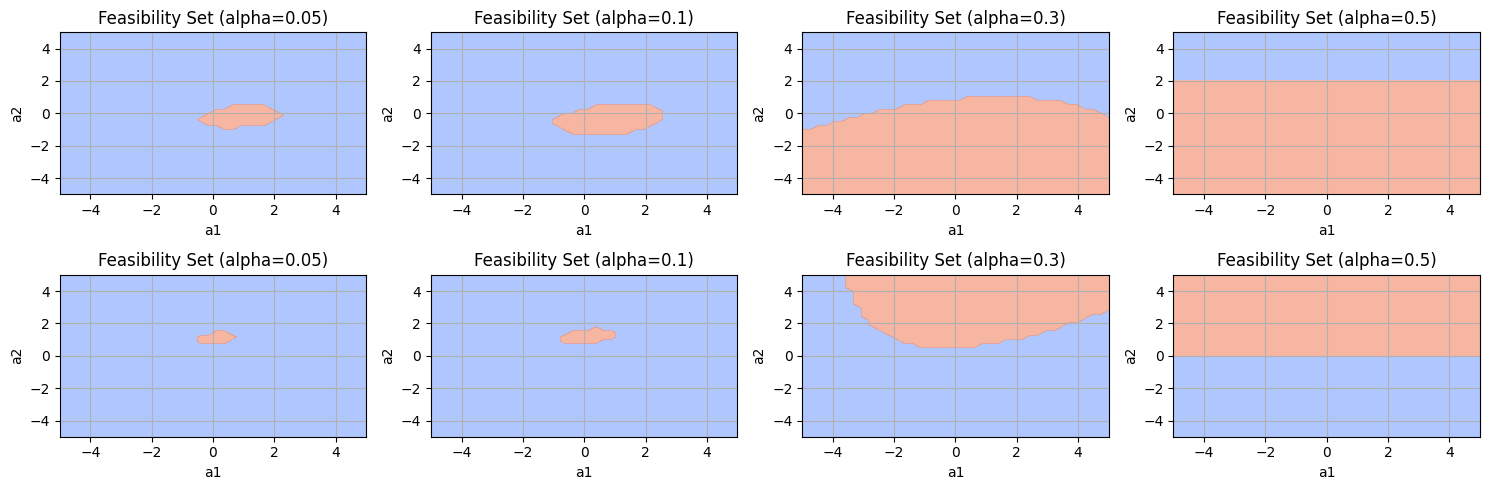

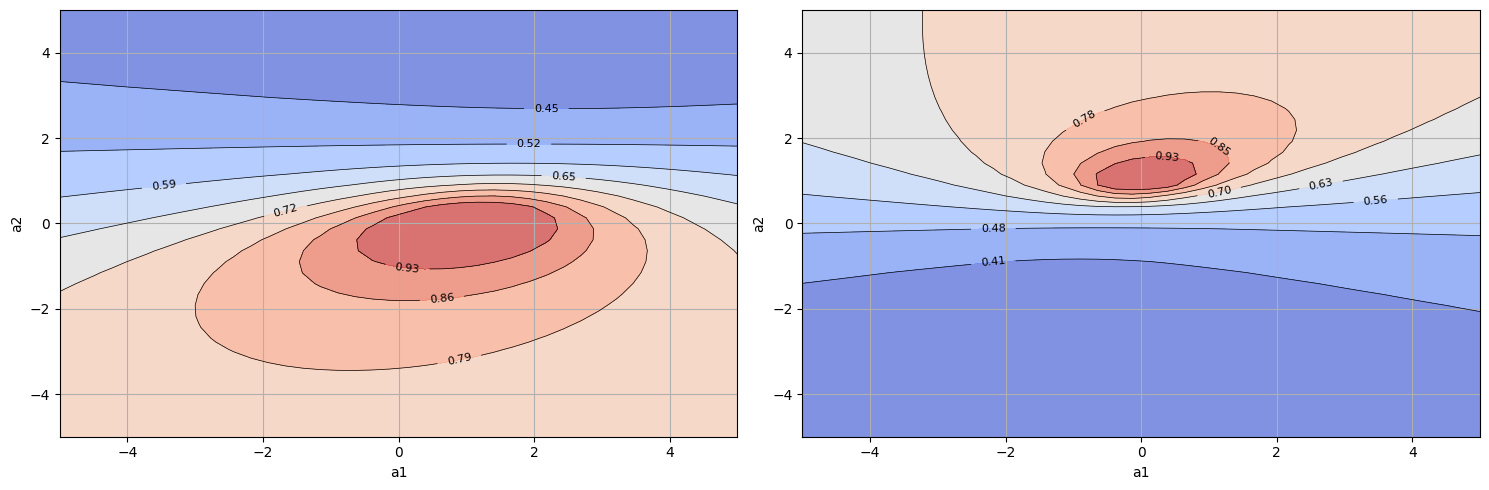

In [18]:
#@title This fuction runs a grid search over the entire design space A, i.e., in the box [-5,+5]
# Define grid for (a1, a2)
a1_vals = np.linspace(-5, 5, 40)
a2_vals = np.linspace(-5, 5, 40)
A1, A2 = np.meshgrid(a1_vals, a2_vals)


# Define constraint probabilities
alpha_levels = [0.05, 0.1,  0.3, 0.5]
# Compute feasibility for each alpha level
fig, axes = plt.subplots(2, len(alpha_levels), figsize=(15, 5))
for i, alpha in enumerate(alpha_levels):
    feasibility_g1 = np.zeros_like(A1)
    probability_g1 = np.zeros_like(A1)
    feasibility_g2 = np.zeros_like(A1)
    probability_g2 = np.zeros_like(A1)
    objective_function_values = np.zeros_like(A1)

    for x in range(A1.shape[0]):
        for y in range(A1.shape[1]):
            _, prob_g1, prob_g2 = compute_probability_magingal_and_jointly(A1[x, y], A2[x, y],b=b_selected)  # HERE WE ARE ONLY SAVING THE MARGINAL PROBABILITY
            feasibility_g1[x, y] = prob_g1 >= 1 - alpha  # Compute if it feasibility or not (an indicator function)
            feasibility_g2[x, y] = prob_g2 >= 1 - alpha

            probability_g1[x, y] = prob_g1  # save probabilities
            probability_g2[x, y] = prob_g2

            objective_function_values[x, y] = objective_function(A1[x, y], A2[x, y])


    # Plot feasibility region
    contour = axes[0,i].contourf(A1, A2, feasibility_g1, levels=1, cmap='coolwarm', alpha=0.7)
    axes[0,i].set_title(f'Feasibility Set (alpha={alpha})')
    axes[0,i].set_xlabel('a1')
    axes[0,i].set_ylabel('a2')
    axes[0,i].grid(True)

    contour = axes[1,i].contourf(A1, A2, feasibility_g2, levels=1, cmap='coolwarm', alpha=0.7)
    axes[1,i].set_title(f'Feasibility Set (alpha={alpha})')
    axes[1,i].set_xlabel('a1')
    axes[1,i].set_ylabel('a2')
    axes[1,i].grid(True)

plt.tight_layout()
plt.show()


# Plot feasibility region
levels = np.linspace(np.min(probability_g1),np.max(probability_g1),10)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
contour_filled = axes[0].contourf(A1, A2, probability_g1, levels=levels, cmap='coolwarm', alpha=0.7)# Plot contour fill
contour_lines = axes[0].contour(A1, A2, probability_g1, levels=levels, colors='k', linewidths=0.5)# Add contour lines
axes[0].clabel(contour_lines, inline=True, fontsize=8, fmt="%.2f")# Label contour lines
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a2')
axes[0].grid(True)

levels = np.linspace(np.min(probability_g2),np.max(probability_g2),10)
contour_filled = axes[1].contourf(A1, A2, probability_g2, levels=levels, cmap='coolwarm', alpha=0.7)# Plot contour fill
contour_lines = axes[1].contour(A1, A2, probability_g2, levels=levels, colors='k', linewidths=0.5)# Add contour lines
axes[1].clabel(contour_lines, inline=True, fontsize=8, fmt="%.2f")# Label contour lines
axes[1].set_xlabel('a1')
axes[1].set_ylabel('a2')
axes[1].grid(True)

plt.tight_layout()
plt.show()





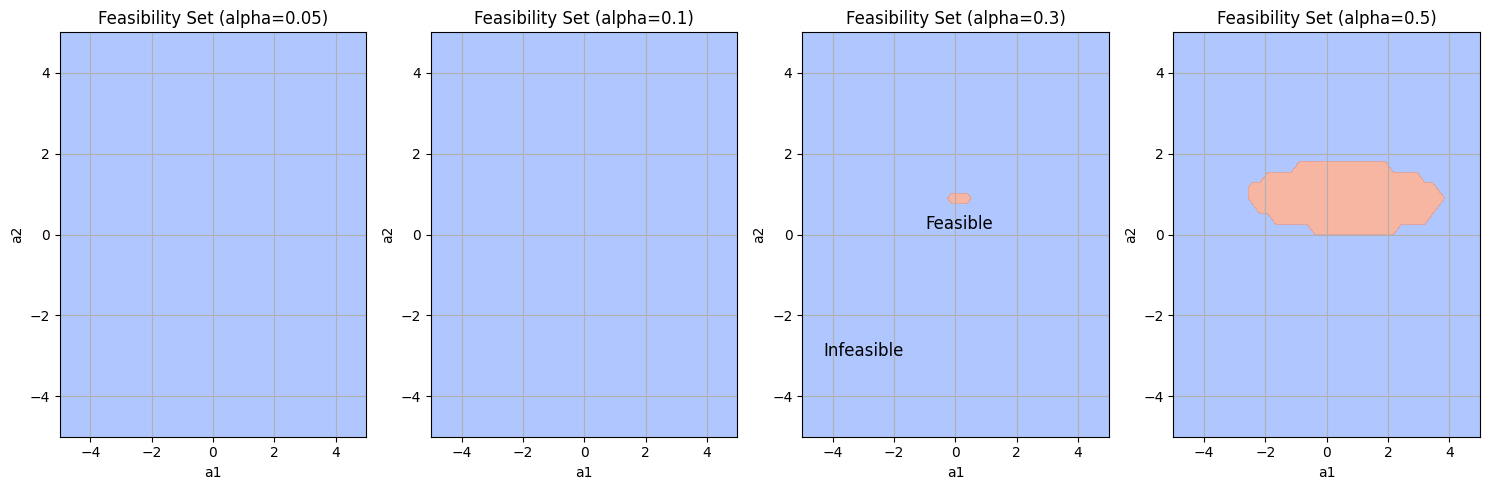

In [19]:
#@title Repeat the analysis, but this this time we focus on the joint Chance Constraint
# Compute feasibility for each alpha level

fig, axes = plt.subplots(1, len(alpha_levels), figsize=(15, 5))
for i, alpha in enumerate(alpha_levels):
    feasibility = np.zeros_like(A1)
    probability = np.zeros_like(A1)

    for x in range(A1.shape[0]):
        for y in range(A1.shape[1]):
            prob, _, _ = compute_probability_magingal_and_jointly(A1[x, y], A2[x, y], b=b_selected)  # HERE WE ARE ONLY SAVING THE JOINT PROBABILITY
            feasibility[x, y] = prob >= 1 - alpha  # save feasibility
            probability[x, y] = prob  # save probabilities

    # Plot feasibility region
    contour = axes[i].contourf(A1, A2, feasibility, levels=1, cmap='coolwarm', alpha=0.7)
    axes[i].set_title(f'Feasibility Set (alpha={alpha})')
    axes[i].set_xlabel('a1')
    axes[i].set_ylabel('a2')
    axes[i].grid(True)

    # Add labels for feasible and infeasible regions
    if i == len(alpha_levels) - 2:  # Only for the second last subplot

      mid_x, mid_y = A1.shape[0] // 2, A1.shape[1] // 2
      axes[i].text(A1[mid_x, mid_y], A2[mid_x, mid_y], "Feasible", fontsize=12, color='black', ha='center')
      axes[i].text(-3, -3, "Infeasible", fontsize=12, color='black', ha='center')

plt.tight_layout()
plt.show()



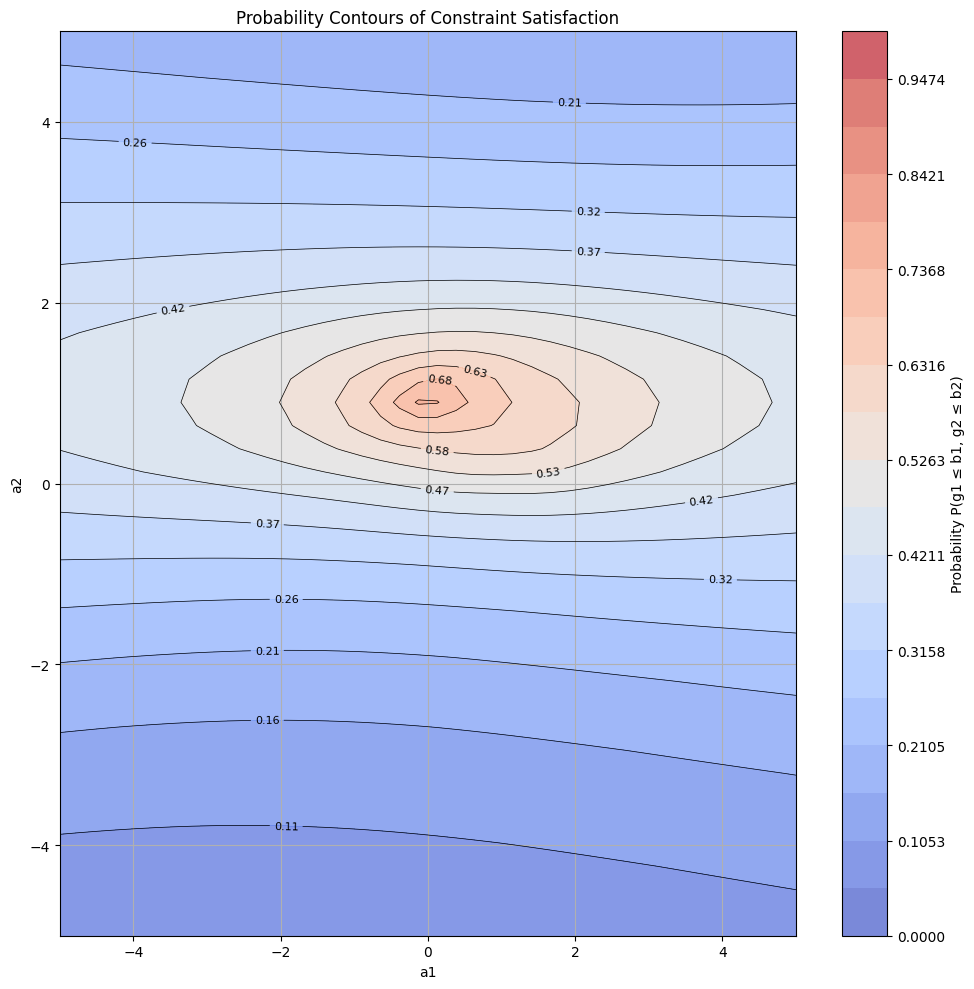

In [20]:
#@title Visualize probability
plt.figure(figsize=(10, 10))
# Define contour levels
levels = np.linspace(0, 1, 20)  # Adjust granularity if needed
contour_filled = plt.contourf(A1, A2, probability, levels=levels, cmap='coolwarm', alpha=0.7)# Plot contour fill
contour_lines = plt.contour(A1, A2, probability, levels=levels, colors='k', linewidths=0.5)# Add contour lines
plt.clabel(contour_lines, inline=True, fontsize=8, fmt="%.2f")# Label contour lines

# Add colorbar
cbar = plt.colorbar(contour_filled)
cbar.set_label('Probability P(g1 ≤ b1, g2 ≤ b2)')
# Labels and grid
plt.xlabel('a1')
plt.ylabel('a2')
plt.title('Probability Contours of Constraint Satisfaction')
plt.grid(True)

plt.tight_layout()
plt.show()

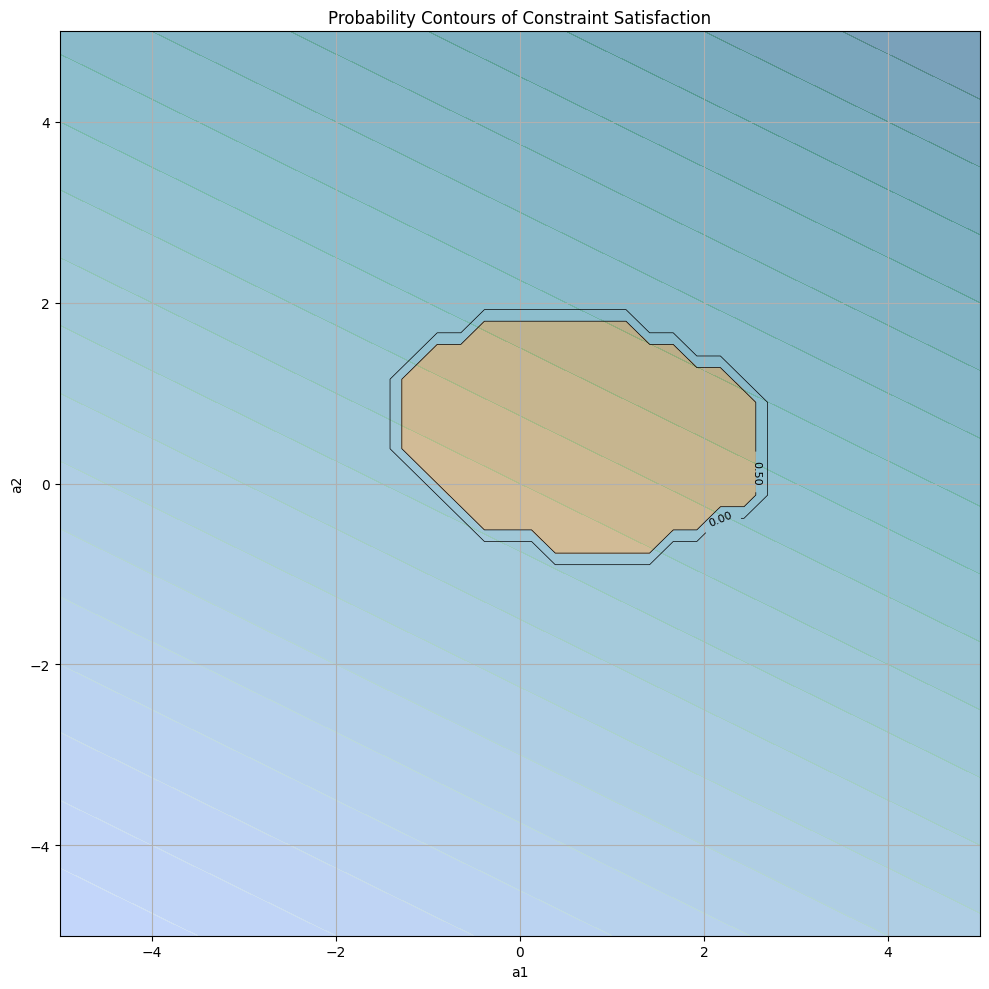

In [ ]:
 #@title Visualize probability
plt.figure(figsize=(10, 10))
# Define contour levels
one_mius_alpha =0.4
contour_filled = plt.contourf(A1, A2, probability>one_mius_alpha, levels=1, cmap='coolwarm', alpha=0.7)# Plot contour fill
contour_lines = plt.contour(A1, A2, probability>one_mius_alpha, levels=1, colors='k', linewidths=0.5)# Add contour lines
plt.clabel(contour_lines, inline=True, fontsize=8, fmt="%.2f")# Label contour lines

# Add colorbar
plt.contourf(A1, A2, objective_function_values, levels=20, cmap='Greens', alpha=0.3)# Plot contour fill
# Labels and grid
plt.xlabel('a1')
plt.ylabel('a2')
plt.title('Probability Contours of Constraint Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()